<a href="https://colab.research.google.com/github/ankeshkmr2010/ml_and_ann/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assinment House loan data analysis using nueral net - Ankesh

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import keras
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from matplotlib import pyplot

In [3]:
data = pd.read_csv("/content/drive/MyDrive/AEKA_TECH/loan_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Null Values

In [6]:
total = (data.isnull().sum()/data.shape[0])*100


In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(total.sort_values(ascending=False))

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## Data Imbalance count

In [8]:
(data.TARGET.value_counts()/data.shape[0]) *100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [9]:
data.shape[0]

307511

## Null value check and processing

In [10]:
# total = pd.DataFrame(total,columns=["col_name","percentage"], index=False)
total  = total.to_frame().reset_index()
total.rename(columns={"index":"col_name",0:"percentage"},inplace=True)

In [11]:
total

,col_name,percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [12]:
to_remove =list( total[total.percentage > 33].col_name )
to_remove

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [13]:
#rmove the columns to drop from data frame and null percentage df
df_clean = data.drop(to_remove, axis='columns')

for col_name in to_remove:
  total.drop( total[total["col_name"] == col_name].index, axis='rows',inplace=True)
total

,col_name,percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [14]:
df_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
data.shape

(307511, 122)

## OCCUPATION_TYPE

`df_clean[df_clean["TARGET"] == 1].OCCUPATION_TYPE.value_counts()` : defaulting by category

`df_clean.OCCUPATION_TYPE.value_counts()` : total count

Even though OCCUPATION_TYPE has high null count 33 % but including this as this seems like a pretty relevant field as per domain logic.
As can be seen below low skill occupation type have a higher defaulting percentage

In [17]:
(df_clean[df_clean["TARGET"] == 1].OCCUPATION_TYPE.value_counts()/df_clean.OCCUPATION_TYPE.value_counts() *100).sort_values()

Accountants               4.830327
High skill tech staff     6.159930
Managers                  6.214028
Core staff                6.303954
HR staff                  6.394316
IT staff                  6.463878
Private service staff     6.598793
Medicine staff            6.700246
Secretaries               7.049808
Realty agents             7.856192
Cleaning staff            9.606705
Sales staff               9.631799
Cooking staff            10.443996
Laborers                 10.578770
Security staff           10.742449
Waiters/barmen staff     11.275964
Drivers                  11.326130
Low-skill Laborers       17.152413
Name: OCCUPATION_TYPE, dtype: float64

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df_clean.nunique().sort_values())

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

## Process columns that have Nan

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(total.sort_values('percentage'))

                        col_name  percentage
0                     SK_ID_CURR    0.000000
33       HOUR_APPR_PROCESS_START    0.000000
34    REG_REGION_NOT_LIVE_REGION    0.000000
35    REG_REGION_NOT_WORK_REGION    0.000000
36   LIVE_REGION_NOT_WORK_REGION    0.000000
38        REG_CITY_NOT_WORK_CITY    0.000000
39       LIVE_CITY_NOT_WORK_CITY    0.000000
40             ORGANIZATION_TYPE    0.000000
96               FLAG_DOCUMENT_2    0.000000
97               FLAG_DOCUMENT_3    0.000000
98               FLAG_DOCUMENT_4    0.000000
99               FLAG_DOCUMENT_5    0.000000
100              FLAG_DOCUMENT_6    0.000000
101              FLAG_DOCUMENT_7    0.000000
102              FLAG_DOCUMENT_8    0.000000
103              FLAG_DOCUMENT_9    0.000000
104             FLAG_DOCUMENT_10    0.000000
105             FLAG_DOCUMENT_11    0.000000
106             FLAG_DOCUMENT_12    0.000000
107             FLAG_DOCUMENT_13    0.000000
108             FLAG_DOCUMENT_14    0.000000
109       

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [21]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
#  = sm.fit_resample(x,y)

In [22]:
# cols for encoding
sel_cols = list(df_clean.select_dtypes(include='object'))
sel_cols


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

# Find and fill Nan

In [23]:
# find the col that have non zero null values and require necoding
# foor the reaminaing cols having non zero percentage we set na to 0

checklist = list(total[total['percentage'] > 0].col_name )

for sel_col in sel_cols:
  print(f"{sel_col =}")
  if sel_col in checklist:
    print(f"obj type col {sel_col =} removing from checklist")
    checklist.remove(sel_col)

sel_col ='NAME_CONTRACT_TYPE'
sel_col ='CODE_GENDER'
sel_col ='FLAG_OWN_CAR'
sel_col ='FLAG_OWN_REALTY'
sel_col ='NAME_TYPE_SUITE'
obj type col sel_col ='NAME_TYPE_SUITE' removing from checklist
sel_col ='NAME_INCOME_TYPE'
sel_col ='NAME_EDUCATION_TYPE'
sel_col ='NAME_FAMILY_STATUS'
sel_col ='NAME_HOUSING_TYPE'
sel_col ='OCCUPATION_TYPE'
obj type col sel_col ='OCCUPATION_TYPE' removing from checklist
sel_col ='WEEKDAY_APPR_PROCESS_START'
sel_col ='ORGANIZATION_TYPE'


In [24]:
df_clean.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
checklist

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [26]:
proc_df =df_clean.copy()

for col_name in checklist:
  print(f" processing { col_name = }")
  proc_df[col_name].fillna(0,inplace=True)

sanity = (proc_df.isnull().sum()/proc_df.shape[0])*100

 processing  col_name = 'AMT_ANNUITY'
 processing  col_name = 'AMT_GOODS_PRICE'
 processing  col_name = 'CNT_FAM_MEMBERS'
 processing  col_name = 'EXT_SOURCE_2'
 processing  col_name = 'EXT_SOURCE_3'
 processing  col_name = 'OBS_30_CNT_SOCIAL_CIRCLE'
 processing  col_name = 'DEF_30_CNT_SOCIAL_CIRCLE'
 processing  col_name = 'OBS_60_CNT_SOCIAL_CIRCLE'
 processing  col_name = 'DEF_60_CNT_SOCIAL_CIRCLE'
 processing  col_name = 'DAYS_LAST_PHONE_CHANGE'
 processing  col_name = 'AMT_REQ_CREDIT_BUREAU_HOUR'
 processing  col_name = 'AMT_REQ_CREDIT_BUREAU_DAY'
 processing  col_name = 'AMT_REQ_CREDIT_BUREAU_WEEK'
 processing  col_name = 'AMT_REQ_CREDIT_BUREAU_MON'
 processing  col_name = 'AMT_REQ_CREDIT_BUREAU_QRT'
 processing  col_name = 'AMT_REQ_CREDIT_BUREAU_YEAR'


In [27]:
sanity

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 73, dtype: float64

In [28]:
# adding dummies
cols_1 = pd.get_dummies(proc_df.NAME_TYPE_SUITE, prefix = "NAME_TYPE_SUITE")
cols_2 = pd.get_dummies(proc_df.OCCUPATION_TYPE, prefix = "OCCUPATION_TYPE")

In [29]:
proc_df = pd.concat([proc_df,cols_1,cols_2],axis = 1)

In [30]:
proc_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,1,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
proc_df = proc_df.drop(['OCCUPATION_TYPE','NAME_TYPE_SUITE'], axis = 'columns')

## Find all object dtype cols

In [32]:
sel_cols = list(proc_df.select_dtypes(include='object'))
sel_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [33]:
for sel_col in sel_cols:
  print(f" {sel_col = }  ")
  print(f"{ proc_df[sel_col].value_counts() }\n")
  print(f"{'--' * 20}")

 sel_col = 'NAME_CONTRACT_TYPE'  
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

----------------------------------------
 sel_col = 'CODE_GENDER'  
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

----------------------------------------
 sel_col = 'FLAG_OWN_CAR'  
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

----------------------------------------
 sel_col = 'FLAG_OWN_REALTY'  
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

----------------------------------------
 sel_col = 'NAME_INCOME_TYPE'  
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

----------------------------------------
 sel_col = 'NAME_EDUCATION_TYPE'  
Secondary / secondary special    218

In [34]:
proc_df[['oc_1','oc_2']] = proc_df.ORGANIZATION_TYPE.str.split(":",expand = True)

In [35]:
proc_df['ORGANIZATION_TYPE'] = proc_df['oc_1']

In [36]:
proc_df = proc_df.drop(['oc_2'],axis = 'columns')
proc_df = proc_df.drop(['oc_1'], axis = 1)

## Encoding all object dtype cols

In [37]:
for sel_col in sel_cols:
  print(f" {sel_col = }  ")
  print(f"{ proc_df[sel_col].value_counts() }\n")
  print(f"{'--' * 20}")

 sel_col = 'NAME_CONTRACT_TYPE'  
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

----------------------------------------
 sel_col = 'CODE_GENDER'  
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

----------------------------------------
 sel_col = 'FLAG_OWN_CAR'  
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

----------------------------------------
 sel_col = 'FLAG_OWN_REALTY'  
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

----------------------------------------
 sel_col = 'NAME_INCOME_TYPE'  
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

----------------------------------------
 sel_col = 'NAME_EDUCATION_TYPE'  
Secondary / secondary special    218

In [38]:

fin_proc_df = proc_df.copy()
agg_list = [fin_proc_df]
for sel_col in sel_cols:
  to_add = pd.get_dummies(fin_proc_df[sel_col],prefix=sel_col)
  agg_list.append(to_add)

agg_list
fin_proc_df = pd.concat(agg_list, axis =1)

fin_proc_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,1,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,1
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
fin_proc_df = fin_proc_df.drop(sel_cols, axis =1)

## Imbalance check

In [40]:
(fin_proc_df.TARGET.value_counts()/fin_proc_df.shape[0]) *100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

## SMOTE



In [41]:
x = fin_proc_df.drop(columns=['TARGET'],axis="column")
y = fin_proc_df['TARGET']

In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 163 entries, SK_ID_CURR to ORGANIZATION_TYPE_XNA
dtypes: float64(20), int64(40), uint8(103)
memory usage: 171.0 MB


In [43]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: TARGET
Non-Null Count   Dtype
--------------   -----
307511 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_RES,Y_RES = sm.fit_resample(x,y)


In [45]:
(Y_RES.value_counts()/X_RES.shape[0]) *100

1    50.0
0    50.0
Name: TARGET, dtype: float64

## Train test split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X_RES, Y_RES, test_size=0.33)

In [47]:
y_test.value_counts()

0    93318
1    93255
Name: TARGET, dtype: int64

In [48]:
x_train.shape

(378799, 163)

## Nueral Net

In [49]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)

Num GPUs Available:  1


In [50]:
with strategy.scope():
  model = Sequential(name="defaulter_nn",)
  # l1
  model.add(Dense( 1024, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l2
  model.add(Dense( 1024, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l3
  model.add(Dense( 1024, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l4
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l5
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l6
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l7
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l8
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l9
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l10
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
  # l11
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))

  # l12
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))

  # out has 1 nueron because output is 0 or 1
  model.add(Dense(1, activation='sigmoid'))
  model.summary()


Model: "defaulter_nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              167936    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                     

In [54]:
from keras.optimizers import Adam, Nadam

model.compile(loss='binary_crossentropy',
              optimizer=Nadam(lr=0.05),
              metrics=['accuracy','Precision','Recall','AUC'])

In [55]:
batch_size = 40000
epochs = 2000
with strategy.scope():
  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_test, y_test))
# Model Eval
score = model.evaluate(x_test, y_test, verbose=0)
for i in range(len(score)):
    print(f'{model.metrics_names[i]} — -> {score[i]}')

Epoch 1/2000
10/10 [==============================] - 21s 461ms/step - loss: 0.3078 - accuracy: 0.8727 - precision: 0.8593 - recall: 0.8913 - auc: 0.9426 - val_loss: 0.4896 - val_accuracy: 0.7910 - val_precision: 0.7110 - val_recall: 0.9804 - val_auc: 0.9062
Epoch 2/2000
10/10 [==============================] - 4s 404ms/step - loss: 0.2532 - accuracy: 0.8947 - precision: 0.8828 - recall: 0.9103 - auc: 0.9602 - val_loss: 0.5323 - val_accuracy: 0.7752 - val_precision: 0.6939 - val_recall: 0.9848 - val_auc: 0.8996
Epoch 3/2000
10/10 [==============================] - 4s 391ms/step - loss: 0.2507 - accuracy: 0.8961 - precision: 0.8840 - recall: 0.9118 - auc: 0.9609 - val_loss: 0.4870 - val_accuracy: 0.7929 - val_precision: 0.7125 - val_recall: 0.9817 - val_auc: 0.9080
Epoch 4/2000
10/10 [==============================] - 4s 393ms/step - loss: 0.2508 - accuracy: 0.8950 - precision: 0.8823 - recall: 0.9117 - auc: 0.9609 - val_loss: 0.5048 - val_accuracy: 0.7926 - val_precision: 0.7124 - val_

Final Values
*  accuracy — -> 0.8861571550369263
*  precision — -> 0.8331467509269714
*  recall — -> 0.9656211733818054
*  auc — -> 0.9630800485610962



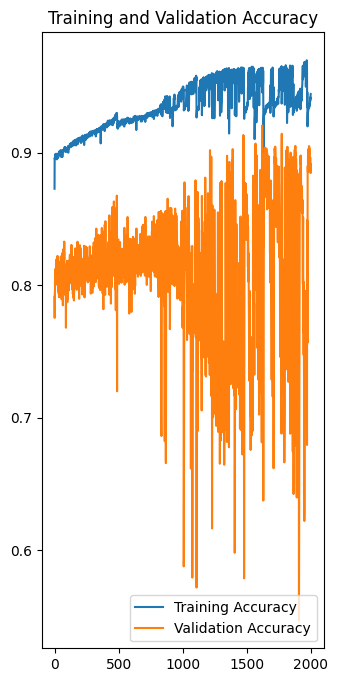

In [56]:
import matplotlib.pyplot as plt
epochs = 2000
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()